In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from os import path

In [2]:
DATA_DIR = r'C:\Users\logan\Documents\LTCWH\code-hockey-files-0.0.7\data'
dfs = pd.read_csv(path.join(DATA_DIR, 'shots.csv'))

In [3]:
dfs['goal'] = dfs['event'] == 'Goal'
dfs['period_min'] = (60*20 - dfs['period_time_remaining'])//60

In [4]:
dfs[['name', 'dist', 'shot_type', 'goal', 'st_x', 'st_y']].head(5)

,name,dist,shot_type,goal,st_x,st_y
0,J. McCann,31.575307,snap,False,58.0,6.0
1,J. Skinner,87.281155,slap,False,2.0,7.0
2,J. Vesey,9.486833,wrist,False,86.0,9.0
3,C. Sheary,19.416488,wrist,False,85.0,-19.0
4,R. Ristolainen,59.941638,wrist,False,36.0,-28.0


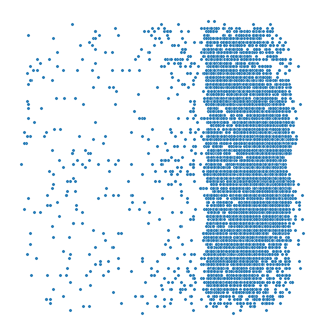

In [6]:
g = sns.relplot(data=dfs, x='st_x', y='st_y', kind='scatter', s=10)
g.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
g.despine(left=True, bottom=True)

In [7]:
map_img = mpimg.imread(path.join(DATA_DIR, 'hockey_rink.png'))

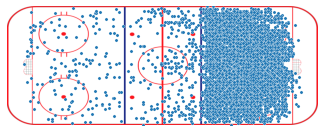

In [9]:
g = sns.relplot(data=dfs, x='st_x', y='st_y', kind='scatter', s=10)
g.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
g.despine(left=True, bottom=True)

for ax in g.fig.axes:
    ax.imshow(map_img, zorder=0, extent=[-110, 110, -42, 42])

In [10]:
# how about a bit of jitter
dfs['xj'] = np.random.uniform(dfs['st_x'] - 0.5, dfs['st_x'] + 0.5)
dfs['yj'] = np.random.uniform(dfs['st_y'] - 0.5, dfs['st_y'] + 0.5)

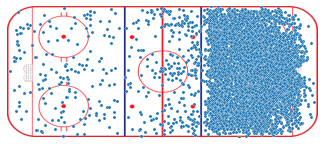

In [11]:

g = sns.relplot(data=dfs, x='xj', y='yj', kind='scatter', s=10)
for ax in g.fig.axes:
    ax.imshow(map_img, zorder=0, extent=[-100, 100, -42, 42])
g.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
g.despine(left=True, bottom=True)


In [12]:
def shot_chart(df, **kwargs):
    g = sns.relplot(data=df, x='xj', y='yj', kind='scatter', **kwargs)
    g.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
    g.despine(left=True, bottom=True)

    for ax in g.fig.axes:
        ax.imshow(map_img, zorder=0, extent=[-110, 110, -42, 42])

    return g

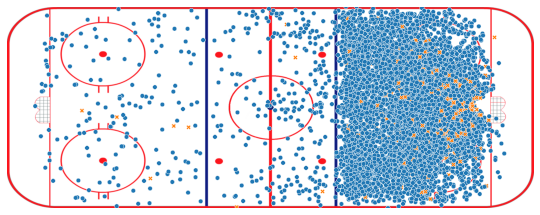

In [13]:
g = shot_chart(dfs, hue='goal', style='goal', s=20, height=8, legend=False)

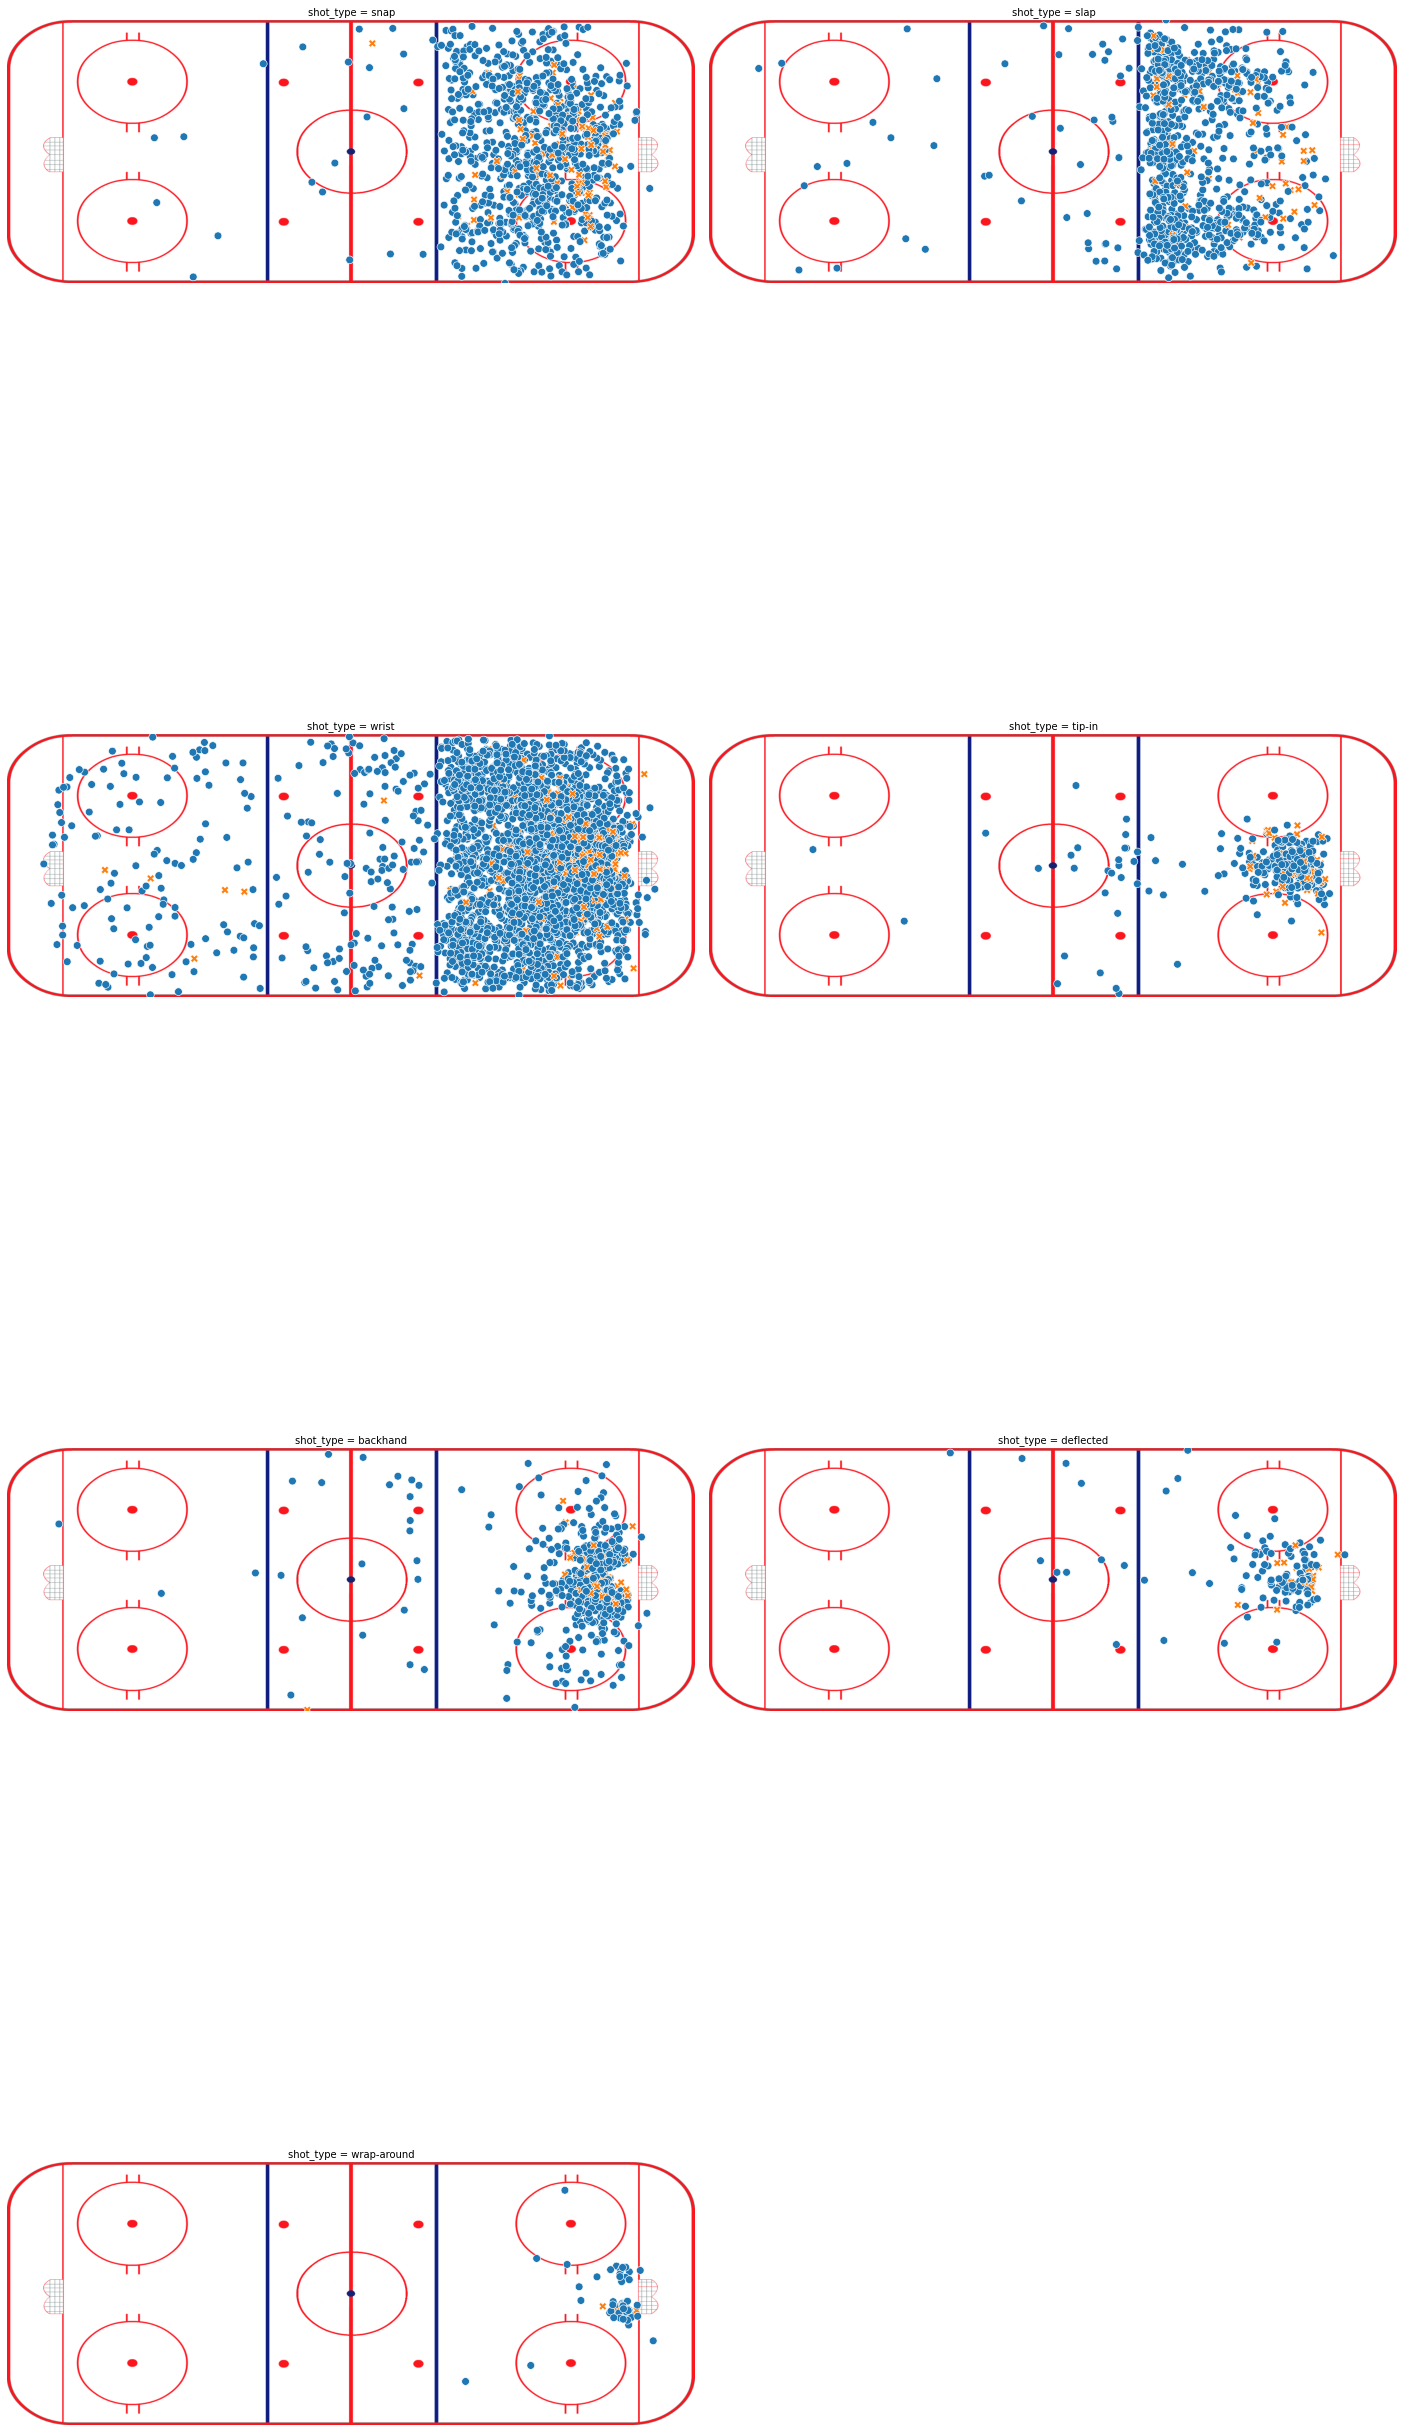

In [27]:
g = shot_chart(dfs, hue='goal', col = 'shot_type', col_wrap = 2, s = 60, height = 10, style='goal', legend = False)

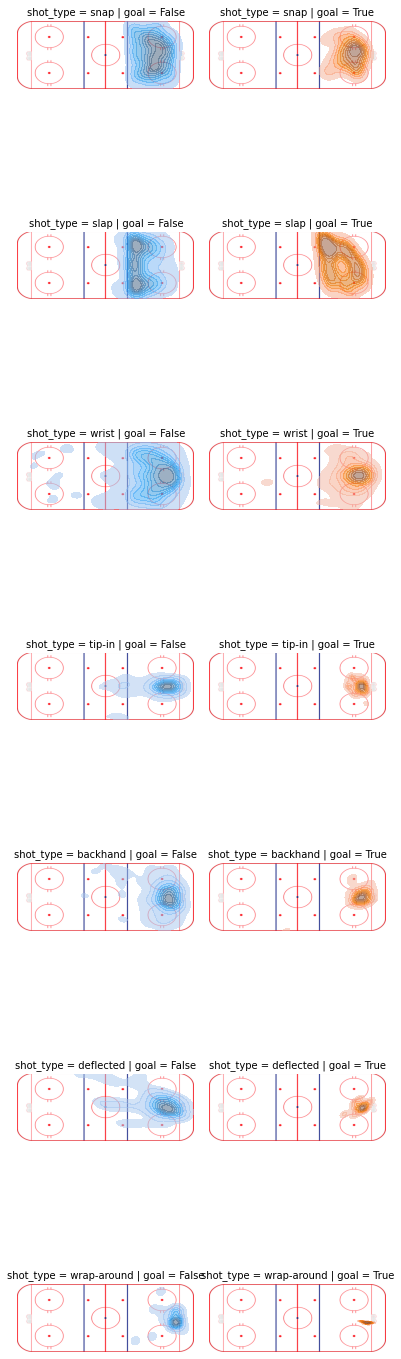

In [30]:
g = (sns.FacetGrid(dfs, col = 'goal', row = 'shot_type', hue = 'goal')
    .map(sns.kdeplot, 'xj', 'yj', alpha = 0.5, shade = True))
g.set(yticks =[], xticks=[], xlabel=None, ylabel=None)
g.despine(left=True, bottom = True)
for ax in g.fig.axes:
      ax.imshow(map_img, zorder=0, extent=[-110, 110, -42, 42])